In [4]:
# -*- coding: utf-8 -*-
"""


@author: profa
"""
## Textmining Naive Bayes Example
import nltk
from sklearn import preprocessing
import pandas as pd
import sklearn
import re  
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
## For Stemming
from nltk.tokenize import sent_tokenize, word_tokenize
import os
from sklearn.model_selection import train_test_split
import random as rd
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
## conda install python-graphviz
## restart kernel (click the little red x next to the Console)
import graphviz 
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA
#from mpl_toolkits.mplot3d import Axes3D 
## conda install python-graphviz
## restart kernel (click the little red x next to the Console)
import graphviz 
from sklearn.metrics import confusion_matrix

from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO  
from IPython.display import Image  
## conda install pydotplus
import pydotplus
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

#from nltk.stem import WordNetLemmatizer 
#LEMMER = WordNetLemmatizer() 

from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer

import string
import numpy as np

##############################################################
##
##       A Stemmer is a function that truncates and combines
##       words such as hikings and hikers. 
##
###############################################################
##
## For Porter
STEMMER=PorterStemmer()
# Use NLTK's PorterStemmer in a function
def MY_STEMMER(str_input):   #I like dogs a lot111 !!"
    words = re.sub(r"[^A-Za-z\-]", " ", str_input).lower().split()   # I, like, dogs, a
    words = [STEMMER.stem(w) for w in words]
    return words
###############################################################
##
## For Snowball
SNOW_STEMMER=SnowballStemmer("english", ignore_stopwords=True)

# Use NLTK's PorterStemmer in a function
def MY_STEMMER_SNOW(str_input):   #I like dogs a lot111 !!"
    words = re.sub(r"[^A-Za-z\-]", " ", str_input).lower().split()   # I, like, dogs, a
    words = [SNOW_STEMMER.stem(w) for w in words]
    return words

####################
##
## For WordNetLemmatizer

LEMMER = WordNetLemmatizer()

# Use NLTK's PorterStemmer in a function
def MY_LEMMER(str_input):   #I like dogs a lot111 !!"
    words = re.sub(r"[^A-Za-z\-]", " ", str_input).lower().split()   # I, like, dogs, a
    words = [LEMMER.lemmatize(w) for w in words]
    return words



In [5]:
#####################################################################
MyCV1=CountVectorizer(input='filename',
                        analyzer = 'word',
                        stop_words='english',
                        lowercase = True
                        )




MyTFV2 =TfidfVectorizer(input='filename',
                        analyzer = 'word',
                        stop_words='english',
                        lowercase = True,
                        )

MyCV3=CountVectorizer(input='filename',
                        analyzer = 'word',
                        stop_words='english',
                        tokenizer=MY_LEMMER,
                        lowercase = True
                        )

MyTFV4=TfidfVectorizer(input='filename',
                        stop_words='english',
                        tokenizer=MY_STEMMER,
                        lowercase = True,
                        max_features=50
                        )
#


FinalDF1=pd.DataFrame() 
FinalDF2=pd.DataFrame()
FinalDF3=pd.DataFrame()
FinalDF4=pd.DataFrame()

In [6]:

## You will need to know where things are on your computer.
## This code assumes that it is in the same folder/location
## as the folders DOG and HIKE. It will loop through the files in
## these two folders and will build the list needed to use
## CounterVectorizer. 
## NOTICE: My loop has a path in it. This is for MY computer - not yours!
## You will need to adjust the path.

for name in ["Artificial_Intelligence", "Data_Science", 'Machine_Learning']:

    builder=name+"DF"    #DOGDF
    #print(builder)
    builderB=name+"DFB"
    
    path="/Users/xingyuchen0810/Downloads/text_mining/"+name
    
    FileList=[]
    for item in os.listdir(path):
        next1=path+ "/" + item
        FileList.append(next1)  
        # print("full list...")
        # print(FileList)
        
        ## Do for all 
        X1=MyCV1.fit_transform(FileList)
        X2=MyTFV2.fit_transform(FileList)
        X3=MyCV3.fit_transform(FileList)
        XB=MyTFV4.fit_transform(FileList)
        
        
        ColumnNames1=MyCV1.get_feature_names()
        NumFeatures1=len(ColumnNames1)
        ColumnNames2=MyTFV2.get_feature_names()
        NumFeatures2=len(ColumnNames2)
        ColumnNames3=MyCV3.get_feature_names()
        NumFeatures3=len(ColumnNames3)
        ColumnNamesB=MyTFV4.get_feature_names()
        NumFeatures4=len(ColumnNamesB)
        # print("Column names: ", ColumnNamesB)
        #Create a name
        
   
    builderS=pd.DataFrame(X1.toarray(),columns=ColumnNames1)
    builderT=pd.DataFrame(X2.toarray(),columns=ColumnNames2)
    builderTS=pd.DataFrame(X3.toarray(),columns=ColumnNames3)
    builderB=pd.DataFrame(XB.toarray(),columns=ColumnNamesB)
    
    ## Add column
    #print("Adding new column....")
    builderS["Label"]=name
    builderT["Label"]=name
    builderTS["Label"]=name
    builderB["Label"]=name
    #print(builderS)
    
    FinalDF1= FinalDF1.append(builderS)
    FinalDF2= FinalDF2.append(builderB)
    FinalDF3= FinalDF3.append(builderT)
    FinalDF4= FinalDF4.append(builderTS)
   
    #print(FinalDF_STEM.head())


## Replace the NaN with 0 because it actually 
## means none in this case
FinalDF1=FinalDF1.fillna(0)
FinalDF2=FinalDF2.fillna(0)
FinalDF3=FinalDF3.fillna(0)
FinalDF4=FinalDF4.fillna(0)

###### REMOVE number columns
## Remove columns with number from this one
##-------------------------------------------------------------------
####### Create a function that removes columns that are/contain nums
##-------------------------------------------------------------------


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever

In [10]:

###### REMOVE number columns
## Remove columns with number from this one
##-------------------------------------------------------------------
####### Create a function that removes columns that are/contain nums
##-------------------------------------------------------------------

def RemoveNums(SomeDF):
    #print(SomeDF)
    print("Running Remove Numbers function....\n")
    temp=SomeDF
    MyList=[]
    for col in temp.columns:
        #print(col)
        #Logical1=col.isdigit()  ## is a num
        Logical2=str.isalpha(col) ## this checks for anything
        ## that is not a letter
        if(Logical2==False):# or Logical2==True):
            #print(col)
            MyList.append(str(col))
            #print(MyList)       
    temp.drop(MyList, axis=1, inplace=True)
            #print(temp)
            #return temp
       
    return temp
##########################################################

## Call the function ....
FinalDF1=RemoveNums(FinalDF1)
FinalDF2=RemoveNums(FinalDF2)
FinalDF3=RemoveNums(FinalDF3)
FinalDF4=RemoveNums(FinalDF4)

## Have a look:
## These print statements help you to see where you are
#print(FinalDF_STEM)
## Remove columns that contain "-"  HOW TO....
#cols = [c for c in FinalDF_STEM.columns if "-" in c[:] ]
#FinalDF_STEM=FinalDF_STEM.drop(cols, axis = 1) 
# print(FinalDF1)  #1
# print(FinalDF2) #4
# print(FinalDF3)  #2
# print(FinalDF4) #3

Running Remove Numbers function....

Running Remove Numbers function....

Running Remove Numbers function....

Running Remove Numbers function....



In [11]:
##################################################
##
##        Now we have 4 labeled dataframes!
##
##        Let's model them.....
##
######################################################

## Create the testing set - grab a sample from the training set. 
## Be careful. Notice that right now, our train set is sorted by label.
## If your train set is large enough, you can take a random sample.
from sklearn.model_selection import train_test_split
import random as rd
#rd.seed(1234)
TrainDF1, TestDF1 = train_test_split(FinalDF1, test_size=0.3)
TrainDF2, TestDF2 = train_test_split(FinalDF2, test_size=0.3)
TrainDF3, TestDF3 = train_test_split(FinalDF3, test_size=0.4)
TrainDF4, TestDF4 = train_test_split(FinalDF4, test_size=0.4)
### OK - at this point we have Train and Test data for the text data
## in DOG and HIKE. 
## Of course, this can be updated to work from sentiment (like POS and NEG)
## and can be update for multiple folders or one folder..

In [12]:


###############################################
## For all FOUR DFs - separate LABELS
#################################################
## IMPORTANT - YOU CANNOT LEAVE LABELS ON THE TEST SET
## Save labels
### TEST ---------------------
Test1Labels=TestDF1["Label"]
Test2Labels=TestDF2["Label"]
Test3Labels=TestDF3["Label"]
Test4Labels=TestDF4["Label"]
## remove labels
TestDF1 = TestDF1.drop(["Label"], axis=1)
TestDF2 = TestDF2.drop(["Label"], axis=1)
TestDF3 = TestDF3.drop(["Label"], axis=1)
TestDF4 = TestDF4.drop(["Label"], axis=1)

## TRAIN ----------------------------
Train1Labels=TrainDF1["Label"]
Train2Labels=TrainDF2["Label"]
Train3Labels=TrainDF3["Label"]
Train4Labels=TrainDF4["Label"]
## remove labels
TrainDF1 = TrainDF1.drop(["Label"], axis=1)
TrainDF2 = TrainDF2.drop(["Label"], axis=1)
TrainDF3 = TrainDF3.drop(["Label"], axis=1)
TrainDF4 = TrainDF4.drop(["Label"], axis=1)



In [16]:

# print(TestDF1)
# print(Test1Labels)
# print(TrainDF1)
print(Test1Labels)






8               Data_Science
5               Data_Science
2    Artificial_Intelligence
6               Data_Science
6    Artificial_Intelligence
0    Artificial_Intelligence
1           Machine_Learning
0               Data_Science
1               Data_Science
Name: Label, dtype: object


In [15]:
# print(TestDF4)
# print(Test4Labels)
# print(TrainDF4)
print(Test4Labels)


4    Artificial_Intelligence
1    Artificial_Intelligence
6               Data_Science
0    Artificial_Intelligence
8               Data_Science
5               Data_Science
2               Data_Science
5           Machine_Learning
0               Data_Science
7               Data_Science
9           Machine_Learning
9               Data_Science
Name: Label, dtype: object


In [58]:

####################################################################
########################### Naive Bayes ############################
####################################################################
from sklearn.naive_bayes import MultinomialNB
#https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB.fit
#Create the modeler
MyModelNB= MultinomialNB()



## Run on all three Dfs.................
NB1=MyModelNB.fit(TrainDF1, Train1Labels)
Prediction1 = MyModelNB.predict(TestDF1)
# print('the probabilities for df1')
# print(np.round(MyModelNB.predict_proba(TestDF1),2))

NB2=MyModelNB.fit(TrainDF2, Train2Labels)
Prediction2 = MyModelNB.predict(TestDF2)
# print('the probabilities for df2')
# print(np.round(MyModelNB.predict_proba(TestDF2),2))

NB3=MyModelNB.fit(TrainDF3, Train3Labels)
Prediction3 = MyModelNB.predict(TestDF3)
# print('the probabilities for df3')
# print(np.round(MyModelNB.predict_proba(TestDF3),2))

NB4=MyModelNB.fit(TrainDF4, Train4Labels)
Prediction4 = MyModelNB.predict(TestDF4)
# print('the probabilities for df4')
# print(np.round(MyModelNB.predict_proba(TestDF4),2))



print("\nThe prediction from NB1 is:")
print(Prediction1)
print("\nThe actual labels are:")
print(Test1Labels)

print("\nThe prediction from NB2 is:")
print(Prediction2)
print("\nThe actual labels are:")
print(Test2Labels)

print("\nThe prediction from NB3 is:")
print(Prediction3)
print("\nThe actual labels are:")
print(Test3Labels)

print("\nThe prediction from NB4 is:")
print(Prediction4)
print("\nThe actual labels are:")
print(Test4Labels)

## confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
## The confusion matrix is square and is labels X labels
## We ahve two labels, so ours will be 2X2
#The matrix shows
## rows are the true labels
## columns are predicted
## it is al[habetical
## The numbers are how many 
cnf_matrix1 = confusion_matrix(Test1Labels, Prediction1)
# print("\nThe confusion matrix is:")
# print(cnf_matrix1)

cnf_matrix2 = confusion_matrix(Test2Labels, Prediction2)
# print("\nThe confusion matrix is:")
# print(cnf_matrix2)

cnf_matrix3 = confusion_matrix(Test3Labels, Prediction3)
# print("\nThe confusion matrix is:")
# print(cnf_matrix3)

cnf_matrix4 = confusion_matrix(Test4Labels, Prediction4)
# print("\nThe confusion matrix is:")
# print(cnf_matrix4)

# print("Actual: ", Test4Labels)
# print("Prediction: ", Prediction4)


accuracy = accuracy_score(Test1Labels, Prediction1)
print('Accuracy:', accuracy)
accuracy = accuracy_score(Test2Labels, Prediction2)
print('Accuracy:', accuracy)
accuracy = accuracy_score(Test3Labels, Prediction3)
print('Accuracy:', accuracy)
accuracy = accuracy_score(Test4Labels, Prediction4)
print('Accuracy:', accuracy)



The prediction from NB1 is:
['Data_Science' 'Data_Science' 'Artificial_Intelligence' 'Data_Science'
 'Artificial_Intelligence' 'Data_Science' 'Machine_Learning'
 'Data_Science' 'Data_Science']

The actual labels are:
8               Data_Science
5               Data_Science
2    Artificial_Intelligence
6               Data_Science
6    Artificial_Intelligence
0    Artificial_Intelligence
1           Machine_Learning
0               Data_Science
1               Data_Science
Name: Label, dtype: object

The prediction from NB2 is:
['Data_Science' 'Artificial_Intelligence' 'Data_Science' 'Data_Science'
 'Machine_Learning' 'Data_Science' 'Data_Science' 'Data_Science'
 'Data_Science']

The actual labels are:
7    Artificial_Intelligence
8           Machine_Learning
4               Data_Science
1    Artificial_Intelligence
2           Machine_Learning
1               Data_Science
5           Machine_Learning
3           Machine_Learning
0    Artificial_Intelligence
Name: Label, dtype: object

Just CV 0
Tf-Idf 1
CV with Lemming 2
Stem and Binary 3


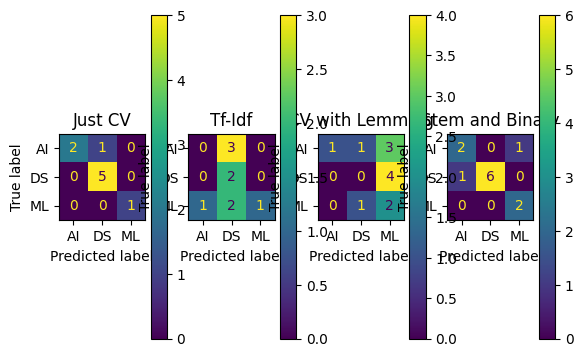

In [19]:

      ################## VIS --------------------
##
## Multiple Confusion Matrices on one Plot
##
######-------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sbs

## "1" is just CV
## "2" is TfIDF
## "3" is CV with Lemming
## "4" is stemmed and binary 
    

plot1 = ConfusionMatrixDisplay(confusion_matrix = cnf_matrix1, 
                                            display_labels = ["AI", "DS", 'ML'])
    
plot2 = ConfusionMatrixDisplay(confusion_matrix = cnf_matrix2, 
                                            display_labels = ["AI", "DS", 'ML'])

plot3 = ConfusionMatrixDisplay(confusion_matrix = cnf_matrix3, 
                                            display_labels = ["AI", "DS", 'ML'])

plot4 = ConfusionMatrixDisplay(confusion_matrix = cnf_matrix4, 
                                            display_labels = ["AI", "DS", 'ML'])

fig, ax = plt.subplots(1,4)
numbers=[0, 1, 2, 3]
names=["Just CV", "Tf-Idf", "CV with Lemming", "Stem and Binary"]

for i,title in zip(numbers,names):   
   print(title, i)
   ax[i].set_title(title)

   ## Create name
   TestsetName=str("Test"+str(i+1)+"Labels")
   #print(TestsetName)
   PredictionName=str("Prediction"+str(i+1))
   #print(PredictionName)
   ConfusionMatrixDisplay(
        confusion_matrix = confusion_matrix(eval(TestsetName), eval(PredictionName)), 
        display_labels = ["AI", "DS", 'ML']).plot(ax=ax[i])






Accuracy: 0.8888888888888888
Accuracy: 0.7777777777777778
Accuracy: 0.9166666666666666
Accuracy: 0.8333333333333334


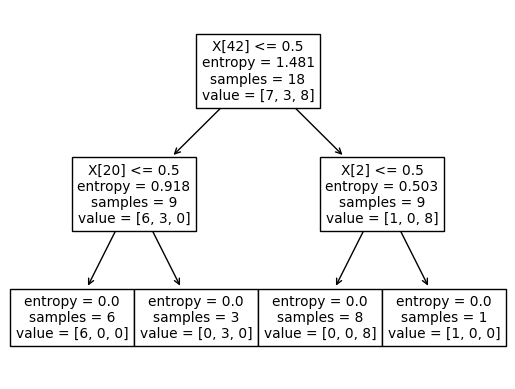

In [57]:

#########################################################
#############    Decision Trees   #######################
#########################################################

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
## conda install python-graphviz
## restart kernel (click the little red x next to the Console)
import graphviz 
from sklearn.metrics import confusion_matrix

#https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
MyDT=DecisionTreeClassifier(criterion='entropy', ##"entropy" or "gini"
                            splitter='best',  ## or "random" or "best"
                            max_depth=None, 
                            min_samples_split=2, 
                            min_samples_leaf=1, 
                            min_weight_fraction_leaf=0.0, 
                            max_features=None, 
                            random_state=None, 
                            max_leaf_nodes=None, 
                            min_impurity_decrease=0.0, 
                            min_impurity_split=None, 
                            class_weight=None)


## ------------------------------
## This for loop will fit and predict Decision Trees for 
## all 4 of the dataframes. Notice that this uses dynamic variables
## and eval
##--------------------------
##
# print(TrainDF1)



for i in [1,2,3,4]:
    temp1=str("TrainDF"+str(i))   ##  TrainDF1
    temp2=str("Train"+str(i)+"Labels")  #Train1Labels
    temp3=str("TestDF"+str(i))  #TestDF1
    temp4=str("Test"+str(i)+"Labels") # Test1Labels
    
    ## perform DT
    #MyDT.fit(TrainDF1, Train1Labels)
    MyDT.fit(eval(temp1), eval(temp2))
    ## plot the tree
    tree.plot_tree(MyDT)
    plt.savefig(temp1)
    feature_names=eval(str(temp1+".columns"))
    dot_data = tree.export_graphviz(MyDT, out_file=None,
                    ## The following creates TrainDF.columns for each
                    ## which are the feature names.
                      feature_names=eval(str(temp1+".columns")),  
                      #class_names=MyDT.class_names,  
                      filled=True, rounded=True,  
                      special_characters=True)                                    
    graph = graphviz.Source(dot_data) 
    ## Create dynamic graph name
    tempname=str("Graph" + str(i))
    graph.render(tempname) 
    ## Show the predictions from the DT on the test set
    # print("\nActual for DataFrame: ", i, "\n")
    # print(eval(temp4))
    # print("Prediction\n")
    DT_pred=MyDT.predict(eval(temp3))
    # print(DT_pred)
    ## Show the confusion matrix
    accuracy = accuracy_score(eval(temp4), DT_pred)
    print('Accuracy:', accuracy)
    # bn_matrix = confusion_matrix(eval(temp4), DT_pred)
    # print("\nThe confusion matrix df"+ str(i) + " is:")
    # print(bn_matrix)
    # FeatureImp=MyDT.feature_importances_   
    # indices = np.argsort(FeatureImp)[::-1]
    ## print out the important features.....
    # for f in range(TrainDF4.shape[1]):
    #     if FeatureImp[indices[f]] > 0:
    #         print("%d. feature %d (%f)" % (f + 1, indices[f], FeatureImp[indices[f]]))
    #         print ("feature name: ", feature_names[indices[f]])

## FYI for small datasets you can zip features....
## print(dict(zip(iris_pd.columns, clf.feature_importances_)))




In [54]:

#########################################################
#############   SVM   #######################
#########################################################
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
## conda install python-graphviz
## restart kernel (click the little red x next to the Console)
import graphviz 
from sklearn.metrics import confusion_matrix
SVM_Model1=LinearSVC(C=1)

for i in [1,2,3,4]:
    temp1=str("TrainDF"+str(i))   ##  TrainDF1
    temp2=str("Train"+str(i)+"Labels")  #Train1Labels
    temp3=str("TestDF"+str(i))  #TestDF1
    temp4=str("Test"+str(i)+"Labels") # Test1Labels
    
    ## perform DT
    #MyDT.fit(TrainDF1, Train1Labels)
    SVM_Model1.fit(eval(temp1), eval(temp2))
    ## Show the predictions from the DT on the test set
    # print("\nActual for DataFrame: ", i, "\n")
    # print(eval(temp2))
    # print("Prediction\n")
    SVM_Model1_pred=SVM_Model1.predict(eval(temp3))
    # print(DT_pred)
    ## Show the confusion matrix
    accuracy = accuracy_score(eval(temp4), SVM_Model1_pred)
    print('Accuracy:', accuracy)
    # bn_matrix = confusion_matrix(eval(temp4), SVM_Model1_pred)
    # print("\nThe confusion matrix df"+ str(i) + " is:")
    # print(bn_matrix)





Accuracy: 1.0
Accuracy: 0.7777777777777778
Accuracy: 0.4166666666666667
Accuracy: 1.0


In [55]:
#########################################################
#############   rbf   #######################
#########################################################

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
## conda install python-graphviz
## restart kernel (click the little red x next to the Console)
import graphviz 
from sklearn.metrics import confusion_matrix
SVM_Model2=sklearn.svm.SVC(C=1, kernel='rbf', 
                           verbose=True, gamma="auto")

for i in [1,2,3,4]:
    temp1=str("TrainDF"+str(i))   ##  TrainDF1
    temp2=str("Train"+str(i)+"Labels")  #Train1Labels
    temp3=str("TestDF"+str(i))  #TestDF1
    temp4=str("Test"+str(i)+"Labels") # Test1Labels
    
    ## perform DT
    SVM_Model2.fit(eval(temp1), eval(temp2))
    ## Show the predictions from the DT on the test set
    # print("\nActual for DataFrame: ", i, "\n")
    # print(eval(temp2))
    # print("Prediction\n")
    SVM_Model2_pred=SVM_Model2.predict(eval(temp3))
    # print(DT_pred)
    ## Show the confusion matrix
    accuracy = accuracy_score(eval(temp4), SVM_Model2_pred)
    print('Accuracy:', accuracy)
    # bn_matrix = confusion_matrix(eval(temp4), SVM_Model2_pred)
    # print("\nThe confusion matrix df"+ str(i) + " is:")
    # print(bn_matrix)






[LibSVM]*.*
optimization finished, #iter = 14
obj = -9.242869, rho = -0.858670
nSV = 12, nBSV = 6
*.*
optimization finished, #iter = 17
obj = -12.834944, rho = 0.811299
nSV = 16, nBSV = 8
*
optimization finished, #iter = 12
obj = -9.282932, rho = 0.849793
nSV = 14, nBSV = 7
Total nSV = 21
Accuracy: 0.1111111111111111
[LibSVM]*
optimization finished, #iter = 10
obj = -13.873757, rho = 0.975856
nSV = 15, nBSV = 11
*
optimization finished, #iter = 10
obj = -11.899053, rho = -0.983396
nSV = 13, nBSV = 8
*
optimization finished, #iter = 11
obj = -11.900595, rho = -0.982081
nSV = 14, nBSV = 8
Total nSV = 21
Accuracy: 0.2222222222222222
[LibSVM]*
optimization finished, #iter = 9
obj = -9.956780, rho = 0.989215
nSV = 11, nBSV = 6
*.*
optimization finished, #iter = 12
obj = -9.950080, rho = 0.990536
nSV = 12, nBSV = 5
*
optimization finished, #iter = 9
obj = -11.935467, rho = 0.989661
nSV = 13, nBSV = 9
Total nSV = 18
Accuracy: 0.25
[LibSVM]*.*
optimization finished, #iter = 14
obj = -5.688496,

In [56]:
##-----------------------------------------
## POLY
##_--------------------------------------------------

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
## conda install python-graphviz
## restart kernel (click the little red x next to the Console)
import graphviz 
from sklearn.metrics import confusion_matrix
SVM_Model3=sklearn.svm.SVC(C=100, kernel='poly',degree=3,
                           gamma="auto", verbose=True)

for i in [1,2,3,4]:
    temp1=str("TrainDF"+str(i))   ##  TrainDF1
    temp2=str("Train"+str(i)+"Labels")  #Train1Labels
    temp3=str("TestDF"+str(i))  #TestDF1
    temp4=str("Test"+str(i)+"Labels") # Test1Labels
    
    ## perform DT
    SVM_Model3.fit(eval(temp1), eval(temp2))
    ## Show the predictions from the DT on the test set
    # print("\nActual for DataFrame: ", i, "\n")
    # print(eval(temp2))
    # print("Prediction\n")
    SVM_Model3_pred=SVM_Model3.predict(eval(temp3))
    # print(DT_pred)
    # Show the confusion matrix
    accuracy = accuracy_score(eval(temp4), SVM_Model3_pred)
    print('Accuracy:', accuracy)
    # bn_matrix = confusion_matrix(eval(temp4), SVM_Model3_pred)
    # print("\nThe confusion matrix df"+ str(i) + " is:")
    # print(bn_matrix)






[LibSVM]*
optimization finished, #iter = 11
obj = -990.566956, rho = -0.987155
nSV = 12, nBSV = 6
*
optimization finished, #iter = 13
obj = -1386.285243, rho = 0.982932
nSV = 16, nBSV = 10
*
optimization finished, #iter = 12
obj = -990.303999, rho = 0.989293
nSV = 14, nBSV = 5
Total nSV = 21
Accuracy: 0.1111111111111111
[LibSVM]*
optimization finished, #iter = 7
obj = -1399.956021, rho = 0.999961
nSV = 14, nBSV = 14
*
optimization finished, #iter = 6
obj = -1199.956366, rho = -0.999963
nSV = 12, nBSV = 12
*
optimization finished, #iter = 6
obj = -1199.956930, rho = -0.999963
nSV = 12, nBSV = 12
Total nSV = 20
Accuracy: 0.2222222222222222
[LibSVM]*
optimization finished, #iter = 5
obj = -999.991959, rho = 0.999990
nSV = 10, nBSV = 10
*
optimization finished, #iter = 5
obj = -999.990188, rho = 0.999990
nSV = 10, nBSV = 10
*
optimization finished, #iter = 6
obj = -1199.988225, rho = 0.999990
nSV = 12, nBSV = 12
Total nSV = 18
Accuracy: 0.25
[LibSVM]*.*
optimization finished, #iter = 13
ob